In [5]:

import os
import random
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tqdm import tqdm
import cv2

100%|██████████| 16/16 [00:00<00:00, 46.65it/s]


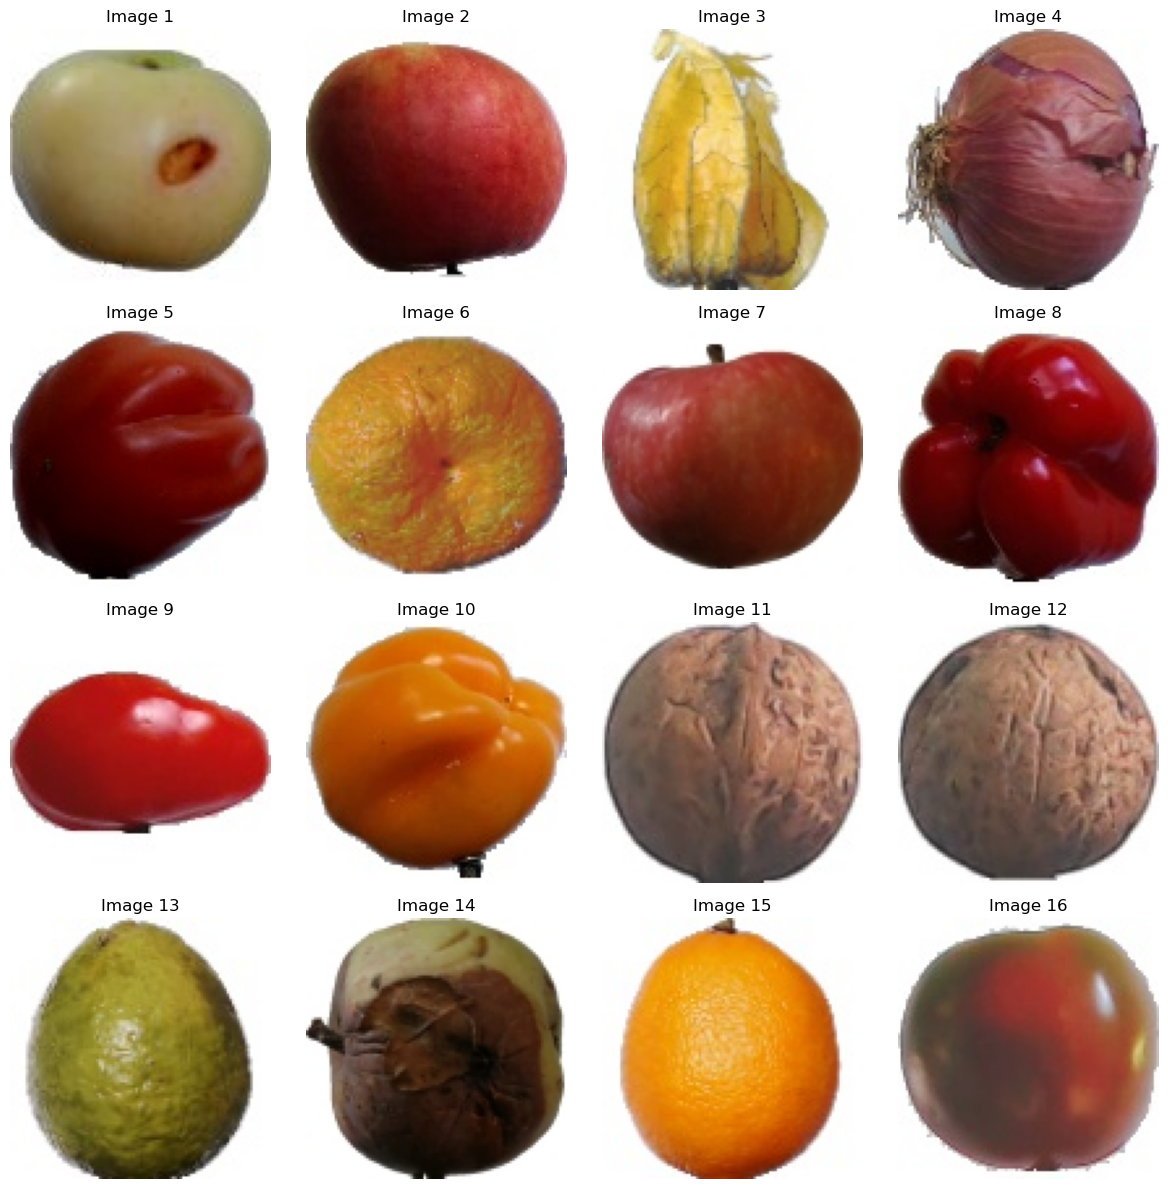

In [7]:


main_folder = r'archive/fruits-360_100x100/fruits-360/Training'

label_mapping = {'Apple 10' : 'Apple',
'Apple 11' : 'Apple',
'Apple 12' : 'Apple',
'Apple 13' : 'Apple',
'Apple 14' : 'Apple',
'Apple 17' : 'Apple',
'Apple 18' : 'Apple',
'Apple 19' : 'Apple',
'Apple 5' : 'Apple',
'Apple 6' : 'Apple',
'Apple 7' : 'Apple',
'Apple 8' : 'Apple',
'Apple 9' : 'Apple',
'Apple Braeburn 1' : 'Apple',
'Apple Core 1' : 'Apple',
'Apple Crimson Snow 1' : 'Apple',
'Apple Golden 1' : 'Apple',
'Apple Golden 2' : 'Apple',
'Apple Golden 3' : 'Apple',
'Apple Granny Smith 1' : 'Apple',
'Apple hit 1' : 'Apple',
'Apple Pink Lady 1' : 'Apple',
'Apple Red 1' : 'Apple',
'Apple Red 2' : 'Apple',
'Apple Red 3' : 'Apple',
'Apple Red Delicious 1' : 'Apple',
'Apple Red Yellow 1' : 'Apple',
'Apple Red Yellow 2' : 'Apple',
'Apple Rotten 1' : 'Apple',
'Apple worm 1' : 'Apple',
'Apricot 1' : 'Apricot',
'Avocado 1' : 'Avocado',
'Avocado ripe 1' : 'Avocado',
'Banana 1' : 'Banana',
'Banana 3' : 'Banana',
'Banana Lady Finger 1' : 'Banana',
'Banana Red 1' : 'Banana',
'Beans 1' : 'Beans',
'Beetroot 1' : 'Beetroot',
'Blackberrie 1' : 'Blackberry',
'Blackberrie 2' : 'Blackberry',
'Blackberrie half rippen 1' : 'Blackberry',
'Blackberrie not rippen 1' : 'Blackberry',
'Blueberry 1' : 'Blueberry',
'Cabbage red 1' : 'Cabbage',
'Cabbage white 1' : 'Blackberry',
'Cactus fruit 1' : 'Cactus Fruit','Cactus fruit green 1' : 'Cactus Fruit','Cactus fruit red 1' : 'Cactus Fruit','Caju seed 1' : 'Caju Seed',
'Cantaloupe 1' : 'Cantaloupe','Cantaloupe 2' : 'Cantaloupe','Carambula 1' : 'Carambula',
'Carrot 1' : 'Carrot',
'Cauliflower 1' : 'Cauliflower',
'Cherimoya 1' : 'Cherimoya',
'Cherry 1' : 'Cherry',
'Cherry 2' : 'Cherry',
'Cherry Rainier 1' : 'Cherry',
'Cherry Wax Black 1' : 'Cherry',
'Cherry Wax not rippen 1' : 'Cherry',
'Cherry Wax Red 1' : 'Cherry',
'Cherry Wax Yellow 1' : 'Cherry',
'Chestnut 1' : 'Chestnut',
'Clementine 1' : 'Clementine',
'Cocos 1' : 'Cocos',
'Corn 1' : 'Corn',
'Corn Husk 1' : 'Corn',
'Cucumber 1' : 'Cucumber',
'Cucumber 10' : 'Cucumber',
'Cucumber 3' : 'Cucumber',
'Cucumber 9' : 'Cucumber',
'Cucumber Ripe 1' : 'Cucumber',
'Cucumber Ripe 2' : 'Cucumber',
'Dates 1' : 'Dates',
'Eggplant 1' : 'Eggplant',
'Eggplant long 1' : 'Eggplant',
'Fig 1' : 'Fig',
'Ginger Root 1' : 'Ginger Root',
'Gooseberry 1' : 'Gooseberry',
'Granadilla 1' : 'Granadilla',
'Grape Blue 1' : 'Grape',
'Grape Pink 1' : 'Grape',
'Grape White 1' : 'Grape',
'Grape White 2' : 'Grape',
'Grape White 3' : 'Grape',
'Grape White 4' : 'Grape',
'Grapefruit Pink 1' : 'Grapefruit',
'Grapefruit White 1' : 'Grapefruit',
'Guava 1' : 'Guava',
'Hazelnut 1' : 'Hazelnut',
'Huckleberry 1' : 'Huckleberry',
'Kaki 1' : 'Kaki',
'Kiwi 1' : 'Kiwi',
'Kohlrabi 1' : 'Kohlrabi',
'Kumquats 1' : 'Kumquats',
'Lemon 1' : 'Lemon',
'Lemon Meyer 1' : 'Lemon',
'Limes 1' : 'Limes',
'Lychee 1' : 'Lychee',
'Mandarine 1' : 'Mandarine',
'Mango 1' : 'Mango',
'Mango Red 1' : 'Mango',
'Mangostan 1' : 'Mangostan',
'Maracuja 1' : 'Maracuja',
'Melon Piel de Sapo 1' : 'Melon',
'Mulberry 1' : 'Mulberry',
'Nectarine 1' : 'Nectarine',
'Nectarine Flat 1' : 'Nectarine',
'Nut Forest 1' : 'Nut Forest',
'Nut Pecan 1' : 'Nut Pecan',
'Onion Red 1' : 'Onion',
'Onion Red Peeled 1' : 'Onion',
'Onion White 1' : 'Onion',
'Orange 1' : 'Orange',
'Papaya 1' : 'Papaya',
'Passion Fruit 1' : 'Passion Fruit',
'Peach 1' : 'Peach',
'Peach 2' : 'Peach',
'Peach Flat 1' : 'Peach',
'Pear 1' : 'Pear',
'Pear 2' : 'Pear',
'Pear 3' : 'Pear',
'Pear Abate 1' : 'Pear',
'Pear Forelle 1' : 'Pear',
'Pear Kaiser 1' : 'Pear',
'Pear Monster 1' : 'Pear',
'Pear Red 1' : 'Pear',
'Pear Stone 1' : 'Pear',
'Pear Williams 1' : 'Pear',
'Pepino 1' : 'Pepino',
'Pepper Green 1' : 'Pepper',
'Pepper Orange 1' : 'Pepper',
'Pepper Red 1' : 'Pepper',
'Pepper Yellow 1' : 'Pepper',
'Physalis 1' : 'Physalis',
'Physalis with Husk 1' : 'Physalis',
'Pineapple 1' : 'Pineapple',
'Pineapple Mini 1' : 'Pineapple',
'Pistachio 1' : 'Pistachio',
'Pitahaya Red 1' : 'Pitahaya',
'Plum 1' : 'Plum',
'Plum 2' : 'Plum',
'Plum 3' : 'Plum',
'Pomegranate 1' : 'Poomegranate',
'Pomelo Sweetie 1' : 'Pomelo',
'Potato Red 1' : 'Potato',
'Potato Red Washed 1' : 'Potato',
'Potato Sweet 1' : 'Potato',
'Potato White 1' : 'Potato',
'Quince 1' : 'Quince',
'Quince 2' : 'Quince',
'Quince 3' : 'Quince',
'Quince 4' : 'Quince',
'Rambutan 1' : 'Rambutan',
'Raspberry 1' : 'Raspberry',
'Redcurrant 1' : 'Redcurrant',
'Salak 1' : 'Salak',
'Strawberry 1' : 'Strawberry',
'Strawberry Wedge 1' : 'Strawberry',
'Tamarillo 1' : 'Tamarillo',
'Tangelo 1' : 'Tangelo',
'Tomato 1' : 'Tomato',
'Tomato 2' : 'Tomato',
'Tomato 3' : 'Tomato',
'Tomato 4' : 'Tomato',
'Tomato 5' : 'Tomato',
'Tomato Cherry Red 1' : 'Tomato',
'Tomato Heart 1' : 'Tomato',
'Tomato Maroon 1' : 'Tomato',
'Tomato not Ripened 1' : 'Tomato',
'Tomato Yellow 1' : 'Tomato',
'Walnut 1' : 'Walnut',
'Watermelon 1' : 'Watermelon',
'Zucchini 1' : 'Zucchini',
'Zucchini dark 1' : 'Zucchini'}

images = []
for folder in os.listdir(main_folder):
    path = os.path.join(main_folder,folder)
    for img in os.listdir(path):
        if img.endswith(('.jpg', '.png', '.webp')):
            images.append(os.path.join(path, img)) 


random_images = random.sample(images, 16)


plt.figure(figsize=(12, 12))
for i, img_path in enumerate(tqdm(random_images)):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(4, 4, i + 1)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.title(f'Image {i+1}')
    
plt.tight_layout()
plt.show()



In [82]:
train_path = 'archive/fruits-360_100x100/fruits-360/Training'
val_path = 'archive/fruits-360_100x100/fruits-360/Test'
IMG_SIZE = 100
batch_size = 128


def get_image_df(base_dir, label_map):
    data = []
    for class_folder in os.listdir(base_dir):
        mapped_class = label_map.get(class_folder, class_folder)  # map or keep original
        folder_path = os.path.join(base_dir, class_folder)
        if os.path.isdir(folder_path):
            for fname in os.listdir(folder_path):
                if fname.lower().endswith(('jpg', 'png', 'jpeg')):
                    data.append({
                        'filepath': os.path.join(folder_path, fname),
                        'label': mapped_class
                    })
    return pd.DataFrame(data)


train_df = get_image_df(train_path, label_mapping)
train_df = train_df.rename(columns={'filepath': 'filename'})
val_df = get_image_df(val_path, label_mapping)
val_df = val_df.rename(columns={'filepath': 'filename'})
all_labels = sorted(set(train_df['label']) | set(val_df['label']))
cnn_preprocess = lambda x: x / 255.0

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=cnn_preprocess)
val_datagen = ImageDataGenerator(preprocessing_function=cnn_preprocess)

cnn_train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    classes=all_labels,
    batch_size=batch_size,
    shuffle=True
)

cnn_val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    classes=all_labels,
    batch_size=batch_size,
    shuffle=False
)


Found 89925 validated image filenames belonging to 77 classes.
Found 29990 validated image filenames belonging to 77 classes.


In [5]:
cnn_model = keras.Sequential([
    keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),

    keras.layers.Dense(units=len(cnn_val_generator.class_indices), activation='softmax', dtype='float32')
])

In [6]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',    
        patience=5,             
        restore_best_weights=True
    ),
    
    ModelCheckpoint(
        filepath='CNN_best_model.keras',  
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False, 
        mode='min',
        verbose=1
    )
]

In [7]:
cnn_model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.CategoricalCrossentropy(), 
               metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')
])

In [8]:


cnn_history = cnn_model.fit(
        cnn_train_generator,
        epochs = 20,
        validation_data = cnn_val_generator,
        callbacks = callbacks
        )



D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6217 - loss: 1.5654 - precision: 0.8471 - recall: 0.5145
Epoch 1: val_loss improved from inf to 0.33773, saving model to CNN_best_model.keras
703/703 ━━━━━━━━━━━━━━━━━━━━ 936s 1s/step - accuracy: 0.6220 - loss: 1.5641 - precision: 0.8472 - recall: 0.5149 - val_accuracy: 0.9081 - val_loss: 0.3377 - val_precision: 0.9226 - val_recall: 0.8997
Epoch 2/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9820 - loss: 0.0573 - precision: 0.9841 - recall: 0.9801
Epoch 2: val_loss improved from 0.33773 to 0.33060, saving model to CNN_best_model.keras
703/703 ━━━━━━━━━━━━━━━━━━━━ 230s 328ms/step - accuracy: 0.9820 - loss: 0.0573 - precision: 0.9841 - recall: 0.9801 - val_accuracy: 0.9315 - val_loss: 0.3306 - val_precision: 0.9357 - val_recall: 0.9291
Epoch 3/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9898 - loss: 0.0324 - precision: 0.9906 - recall: 0.9891
Epoch 3: val_loss improved from 0.33060 to 0.27571,

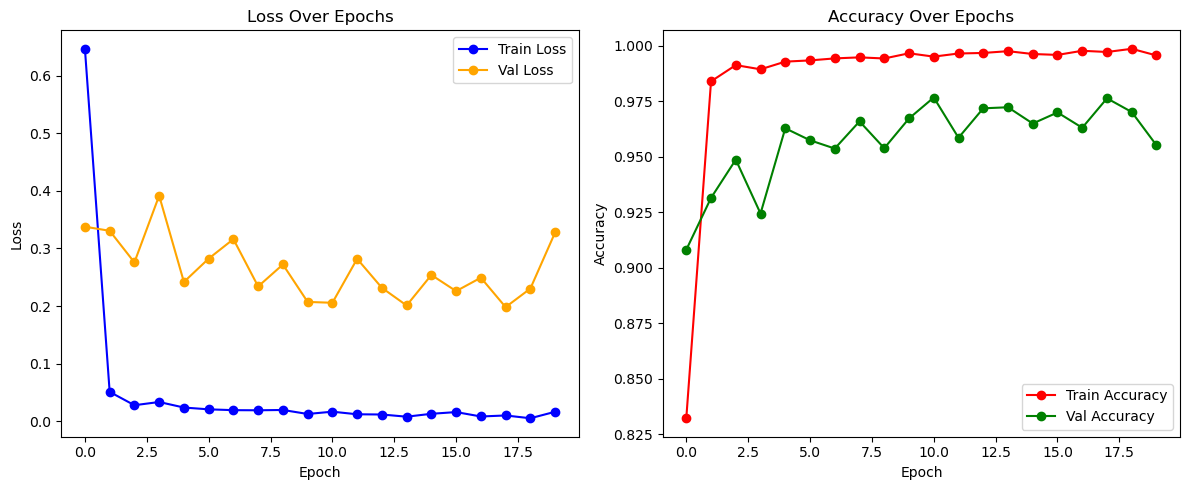

In [28]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# 📉 Loss
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss', marker='o', color='blue')
plt.plot(cnn_history.history['val_loss'], label='Val Loss', marker='o', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 📈 Accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy', marker='o', color='red')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy', marker='o', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Plots.jpg')
plt.show()



In [10]:
results = cnn_model.evaluate(cnn_val_generator) 
print("Metrics names:", cnn_model.metrics_names)
print("Evaluation results:", results)

235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.9827 - loss: 0.1308 - precision: 0.9841 - recall: 0.9825
Metrics names: ['loss', 'compile_metrics']
Evaluation results: [0.1980484127998352, 0.9763921499252319, 0.9776902198791504, 0.9761253595352173]


235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step


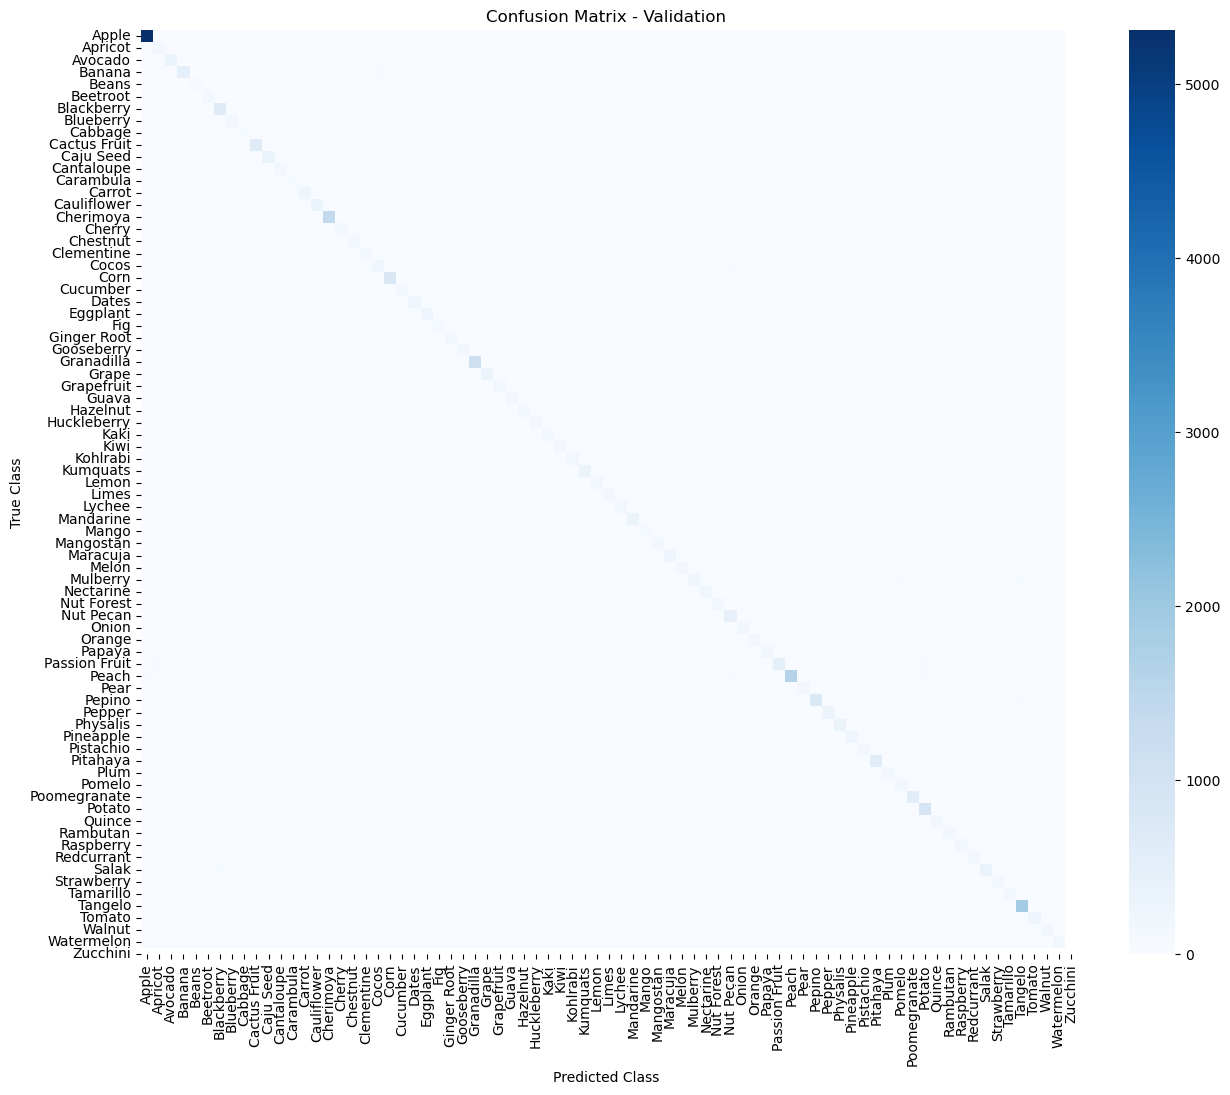

In [30]:
preds = cnn_model.predict(cnn_val_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = cnn_val_generator.classes
class_labels = list(cnn_val_generator.class_indices.keys())

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Validation')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.savefig('ConfMatrix.jpg')
plt.show()

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model, target_size=(100, 100), class_indices=None):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # same preprocessing as training
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict
    preds = model.predict(img_array)
    predicted_index = np.argmax(preds, axis=1)[0]

    # Map index back to label
    if class_indices:
        label_map = dict((v, k) for k, v in class_indices.items())
        predicted_label = label_map[predicted_index]
    else:
        predicted_label = str(predicted_index)  # fallback

    return predicted_label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Text(10, 30, 'Predicted fruit: Corn')

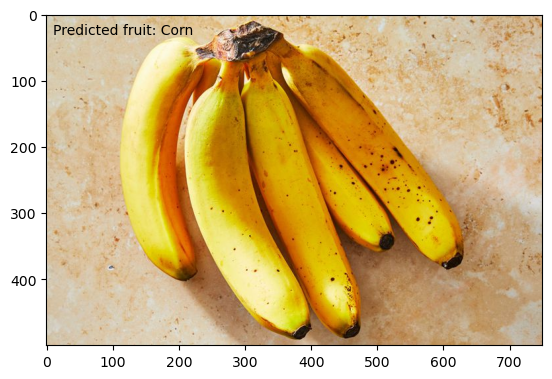

In [68]:
image_path = r"Fruits\Test\banana.jpg"  # 👈 Your image here
predicted_label = predict_image(image_path, cnn_model, target_size=(IMG_SIZE, IMG_SIZE), class_indices=cnn_train_generator.class_indices)
test_image = cv2.imread(image_path)
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
Text = f"Predicted fruit: {predicted_label}"
plt.text(10, 30, Text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Text(10, 250, 'Predicted fruit: Strawberry')

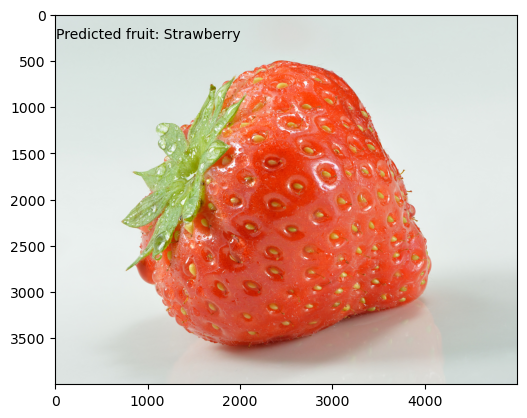

In [72]:
image_path = r"Fruits\Test\Garden_strawberry.jpg"  # 👈 Your image here
predicted_label = predict_image(image_path, cnn_model, target_size=(IMG_SIZE, IMG_SIZE), class_indices=cnn_train_generator.class_indices)
test_image = cv2.imread(image_path)
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
Text = f"Predicted fruit: {predicted_label}"
plt.text(10, 250, Text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Text(10, 10, 'Predicted fruit: Tomato')

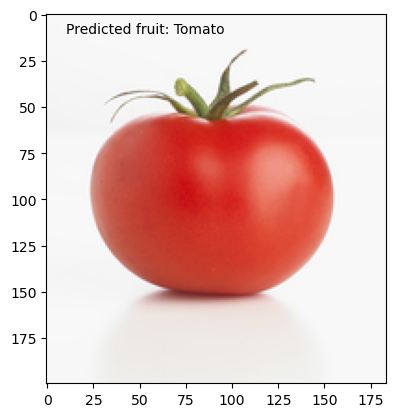

In [76]:
image_path = r"Fruits\Test\Tomato.jpg"  # 👈 Your image here
predicted_label = predict_image(image_path, cnn_model, target_size=(IMG_SIZE, IMG_SIZE), class_indices=cnn_train_generator.class_indices)
test_image = cv2.imread(image_path)
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
Text = f"Predicted fruit: {predicted_label}"
plt.text(10, 10, Text)